In [27]:
# Diabetes Progression Prediction - End-to-End ML Project
# =========================================================

# %% [markdown]
# # 🏥 Diabetes Disease Progression Prediction
# 
# **Objective**: Build a complete ML pipeline to predict diabetes progression
# 
# **Dataset**: Diabetes dataset from sklearn (442 samples, 10 features)
# 
# **Workflow**:
# 1. Exploratory Data Analysis (EDA)
# 2. Feature Engineering
# 3. Model Training & Comparison
# 4. Hyperparameter Tuning
# 5. Model Evaluation & Versioning
# 6. Model Packaging for Production

# %% [markdown]
# ## 1. Setup & Data Loading

# %%
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from datetime import datetime

# ML libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# MLflow for experiment tracking
import mlflow
import mlflow.sklearn

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [28]:
# %%
# Load diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(f"Dataset shape: {df.shape}")
print(f"\nFeature names: {list(diabetes.feature_names)}")
print(f"\nTarget description: {diabetes.DESCR[:500]}...")

# %% [markdown]
# ## 2. Exploratory Data Analysis (EDA)

# %%
# Basic info
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(df.info())
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
print(df.describe())


Dataset shape: (442, 11)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Target description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measur...
DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-nu

In [29]:

# %%
# Check for missing values
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing)
print(f"\n✅ No missing values found!")



Missing Values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

✅ No missing values found!


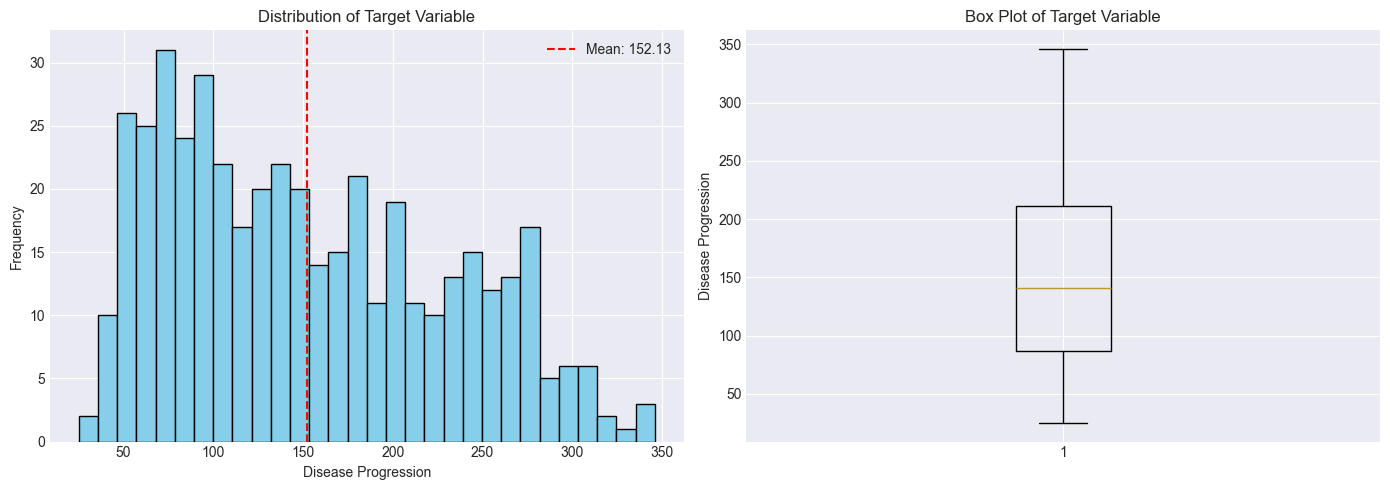

Target Statistics:
  Mean: 152.13
  Median: 140.50
  Std: 77.09
  Min: 25.00
  Max: 346.00


In [30]:

# %%
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['target'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Disease Progression')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Target Variable')
axes[0].axvline(df['target'].mean(), color='red', linestyle='--', label=f'Mean: {df["target"].mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['target'], vert=True)
axes[1].set_ylabel('Disease Progression')
axes[1].set_title('Box Plot of Target Variable')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Target Statistics:")
print(f"  Mean: {df['target'].mean():.2f}")
print(f"  Median: {df['target'].median():.2f}")
print(f"  Std: {df['target'].std():.2f}")
print(f"  Min: {df['target'].min():.2f}")
print(f"  Max: {df['target'].max():.2f}")


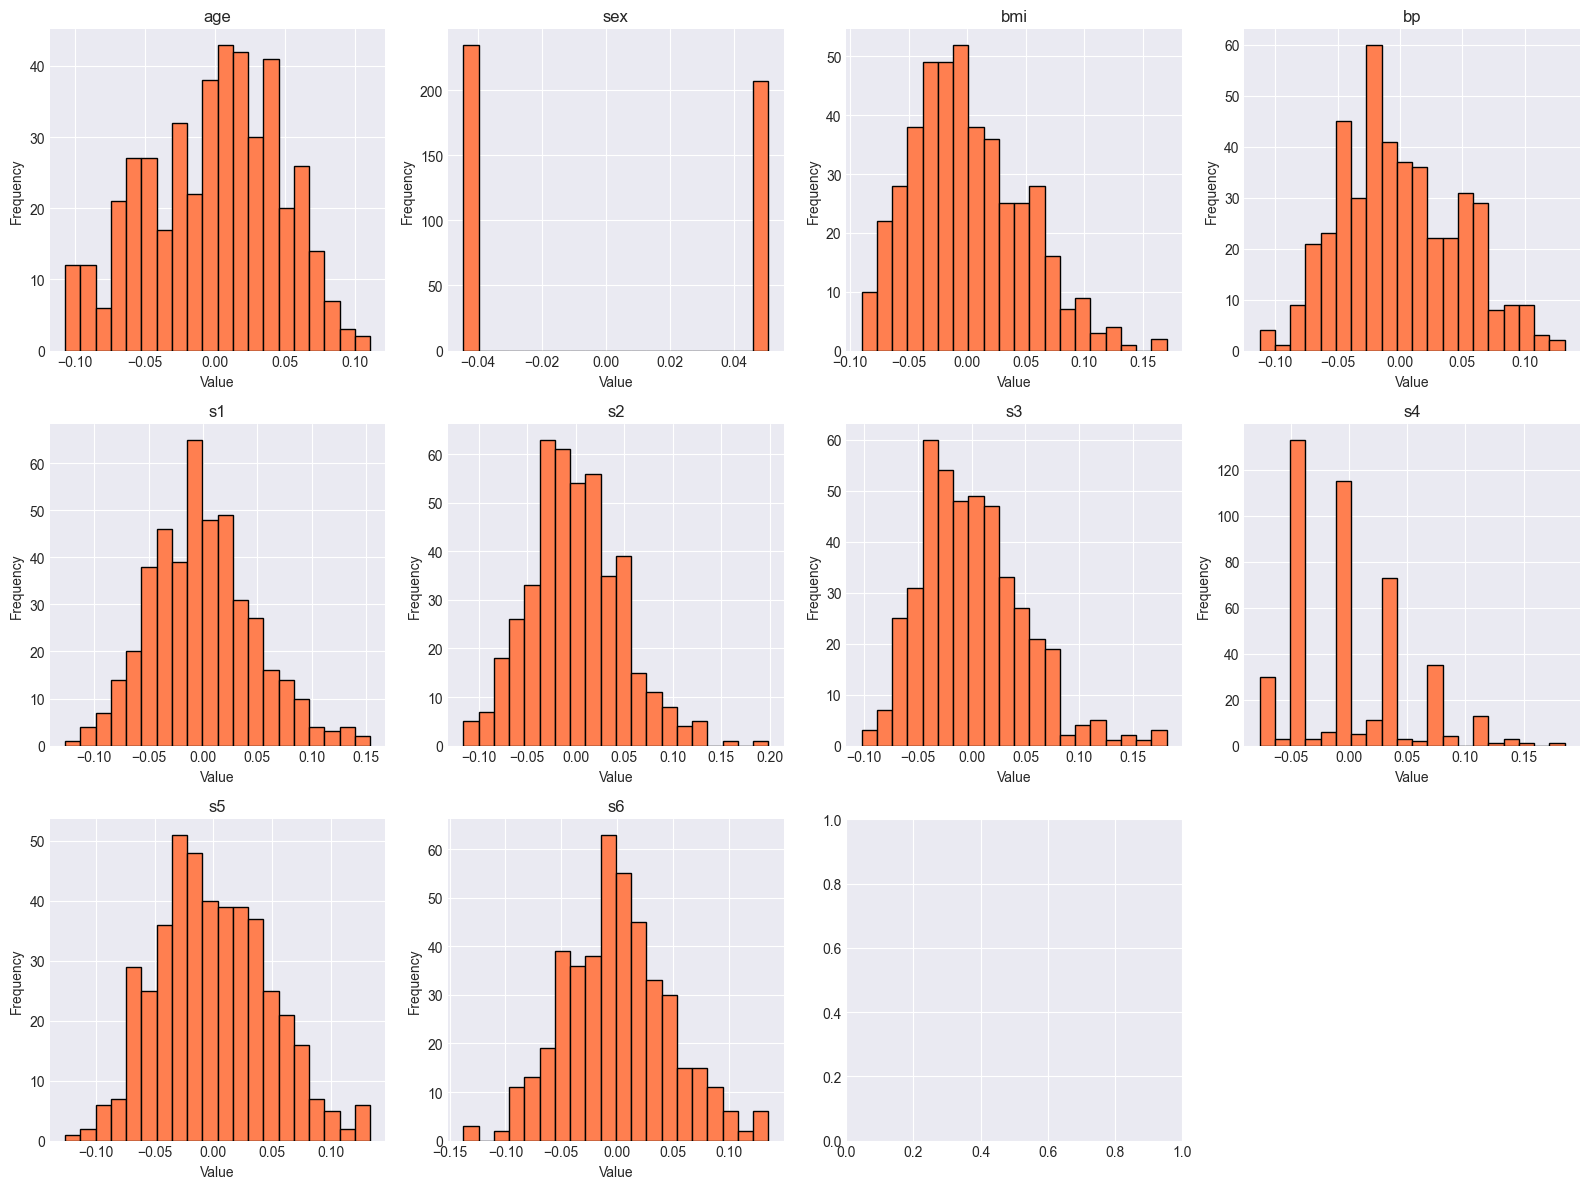

In [31]:

# %%
# Feature distributions
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:-1]):
    axes[idx].hist(df[col], bins=20, color='coral', edgecolor='black')
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


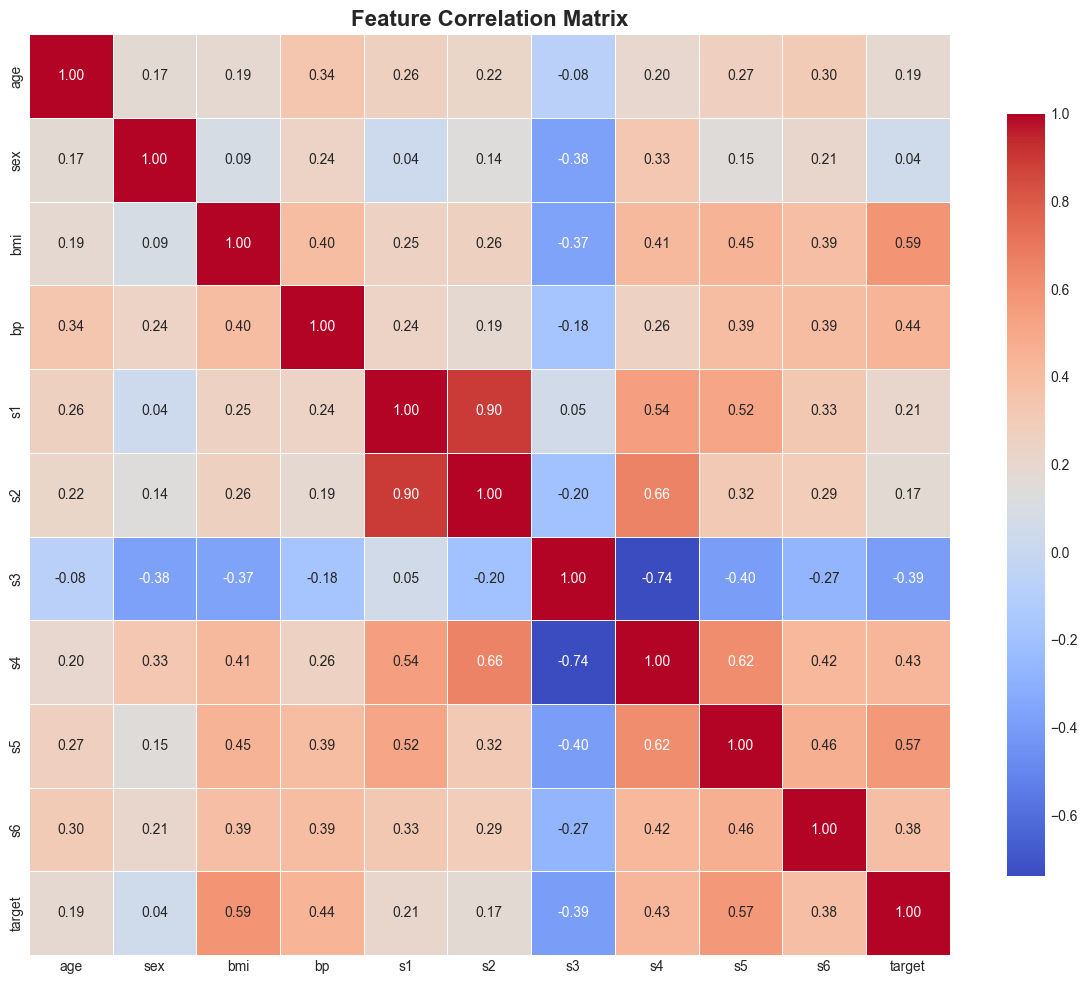

In [32]:

# %%
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



Correlations with Target Variable:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


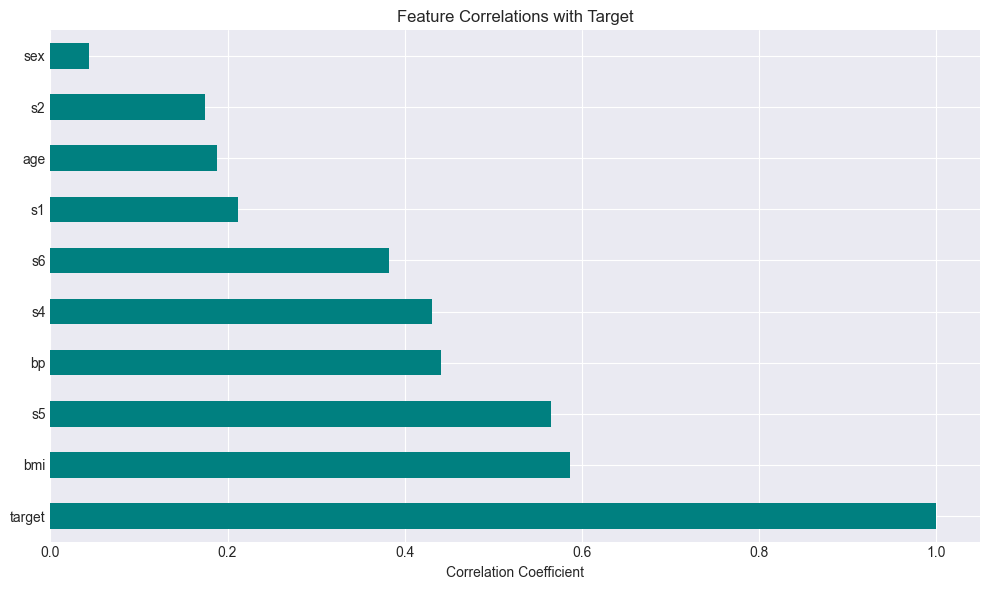

In [33]:

# %%
# Top correlations with target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelations with Target Variable:")
print(target_corr)

# Visualize top correlations
plt.figure(figsize=(10, 6))
target_corr[:-1].plot(kind='barh', color='teal')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlations with Target')
plt.tight_layout()
plt.savefig('feature_importance_corr.png', dpi=300, bbox_inches='tight')
plt.show()


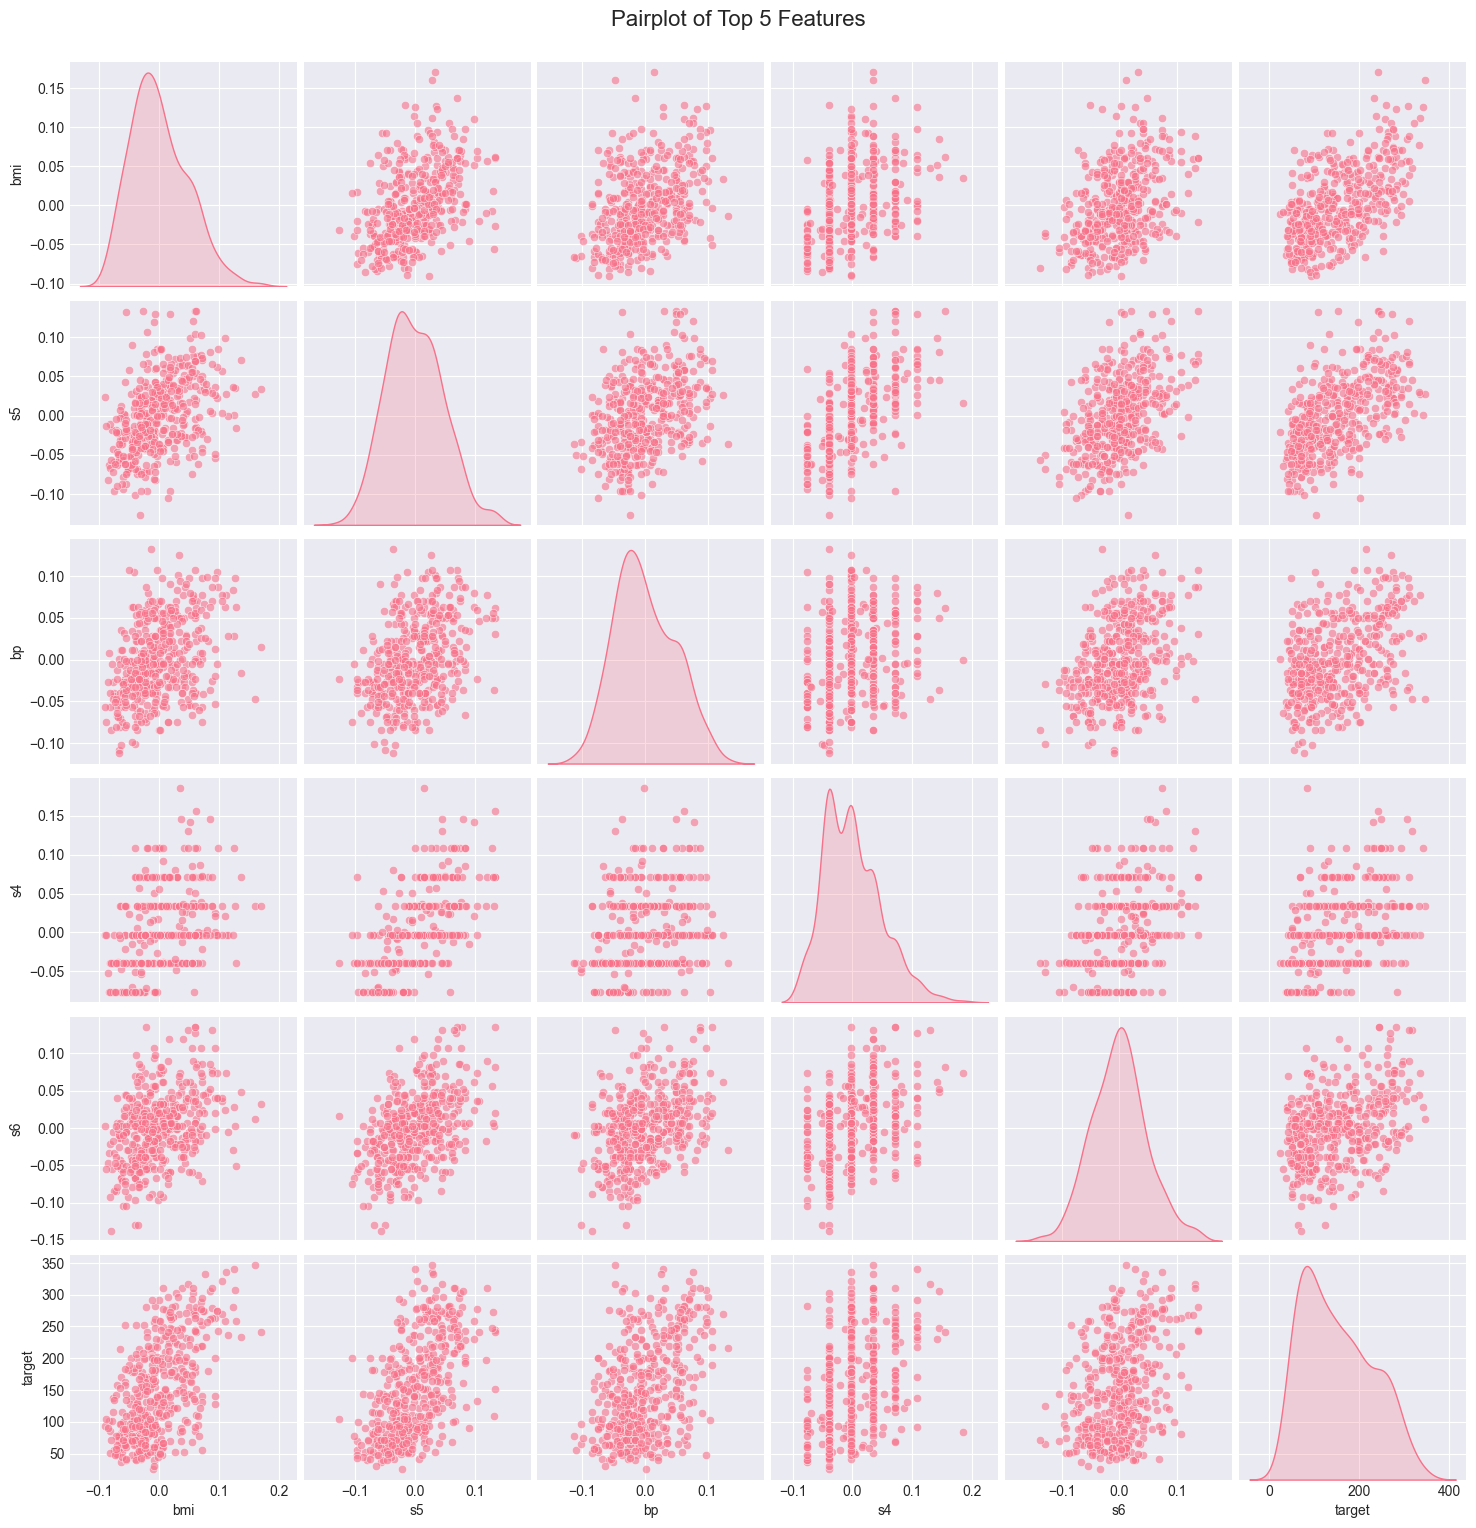

In [34]:

# %%
# Pairplot for top features
top_features = target_corr[1:6].index.tolist()
sns.pairplot(df[top_features + ['target']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top 5 Features', y=1.02, fontsize=16)
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()



In [35]:

# %%
# Create interaction features
print("Creating engineered features...")

# Interaction features
df['bmi_bp'] = df['bmi'] * df['bp']
df['age_bmi'] = df['age'] * df['bmi']
df['s1_s2'] = df['s1'] * df['s2']
df['bmi_squared'] = df['bmi'] ** 2
df['bp_squared'] = df['bp'] ** 2

# Polynomial features for top correlated features
poly = PolynomialFeatures(degree=2, include_bias=False)
top_3_features = df[['bmi', 's5', 'bp']].values
poly_features = poly.fit_transform(top_3_features)
poly_feature_names = [f'poly_{i}' for i in range(poly_features.shape[1])]
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine original and engineered features
df_engineered = pd.concat([df, poly_df], axis=1)

print(f"✅ Original features: {len(diabetes.feature_names)}")
print(f"✅ Total features after engineering: {df_engineered.shape[1] - 1}")
print(f"\nNew feature columns: {list(df_engineered.columns[-10:])}")


Creating engineered features...
✅ Original features: 10
✅ Total features after engineering: 24

New feature columns: ['bp_squared', 'poly_0', 'poly_1', 'poly_2', 'poly_3', 'poly_4', 'poly_5', 'poly_6', 'poly_7', 'poly_8']


In [36]:

# %%
# Prepare data for modeling
X = df_engineered.drop('target', axis=1)
y = df_engineered['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# %%
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

Training set size: (353, 24)
Test set size: (89, 24)
✅ Features scaled using StandardScaler


In [38]:

# %%
# Initialize MLflow
import os

# ensure tracking directory exists and set tracking URI first
mlflow_tracking_dir = os.path.abspath(os.path.join("experiments", "mlruns"))
os.makedirs(mlflow_tracking_dir, exist_ok=True)
mlflow.set_tracking_uri(f"file:{mlflow_tracking_dir}")

experiment_name = "diabetes_progression_prediction"
# create experiment if it doesn't exist to avoid MlflowException
existing_exp = mlflow.get_experiment_by_name(experiment_name)
if existing_exp is None:
    # artifact_location should be a URI; place it under the tracking dir
    artifact_loc = f"file:{os.path.join(mlflow_tracking_dir, experiment_name)}"
    exp_id = mlflow.create_experiment(experiment_name, artifact_location=artifact_loc)
else:
    exp_id = existing_exp.experiment_id

# ensure the named experiment is set for subsequent runs
mlflow.set_experiment(experiment_name)

print("✅ MLflow experiment initialized")
print(f"Tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experiment Name: {experiment_name} (id={exp_id})")


Traceback (most recent call last):
  File "C:\Users\A7med Abbas\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\store\tracking\file_store.py", line 368, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "C:\Users\A7med Abbas\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\store\tracking\file_store.py", line 466, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "C:\Users\A7med Abbas\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1636, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "C:\Users\A7med Abbas\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1629, in _read_helper
    result = read_yaml(root, file_name)
  File "C:\Users\A7med Abbas\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\utils\yaml_utils.py"

✅ MLflow experiment initialized
Tracking URI: file:C:\Users\A7med Abbas\experiments\mlruns
Experiment Name: diabetes_progression_prediction (id=633412018812366308)


In [39]:

# %%
# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

results = {}

print("Training models with MLflow tracking...\n")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        
        # Metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mae = mean_absolute_error(y_test, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                    cv=5, scoring='r2')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        # Log to MLflow
        mlflow.log_param("model_type", name)
        mlflow.log_metric("train_r2", train_r2)
        mlflow.log_metric("test_r2", test_r2)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("cv_r2_mean", cv_mean)
        mlflow.log_metric("cv_r2_std", cv_std)
        
        # Log model
        mlflow.sklearn.log_model(model, "model")
        
        # Store results
        results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'rmse': rmse,
            'mae': mae,
            'cv_mean': cv_mean,
            'cv_std': cv_std
        }
        
        print(f"✅ {name}")
        print(f"   Train R²: {train_r2:.4f}")
        print(f"   Test R²: {test_r2:.4f}")
        print(f"   RMSE: {rmse:.4f}")
        print(f"   CV R² (mean ± std): {cv_mean:.4f} ± {cv_std:.4f}\n")


Training models with MLflow tracking...



2025/11/06 13:21:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 13:22:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/06 13:22:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Linear Regression
   Train R²: 0.5459
   Test R²: 0.4812
   RMSE: 52.4261
   CV R² (mean ± std): 0.4442 ± 0.1414



2025/11/06 13:22:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/06 13:22:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Ridge
   Train R²: 0.5391
   Test R²: 0.4718
   RMSE: 52.9029
   CV R² (mean ± std): 0.4338 ± 0.1422



2025/11/06 13:22:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/06 13:22:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Lasso
   Train R²: 0.5327
   Test R²: 0.4846
   RMSE: 52.2548
   CV R² (mean ± std): 0.4442 ± 0.1325



2025/11/06 13:22:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ ElasticNet
   Train R²: 0.5194
   Test R²: 0.4748
   RMSE: 52.7502
   CV R² (mean ± std): 0.4466 ± 0.1142



2025/11/06 13:22:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 13:22:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest
   Train R²: 0.9240
   Test R²: 0.4202
   RMSE: 55.4225
   CV R² (mean ± std): 0.3962 ± 0.1397



2025/11/06 13:22:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 13:22:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting
   Train R²: 0.8685
   Test R²: 0.4084
   RMSE: 55.9865
   CV R² (mean ± std): 0.3799 ± 0.1277




MODEL COMPARISON RESULTS
                   train_r2   test_r2       rmse        mae   cv_mean  \
Lasso              0.532737  0.484620  52.254794  42.250027  0.444246   
Linear Regression  0.545872  0.481234  52.426127  41.785601  0.444212   
ElasticNet         0.519353  0.474802  52.750168  43.560102  0.446616   
Ridge              0.539094  0.471756  52.902923  42.556610  0.433826   
Random Forest      0.923983  0.420241  55.422459  44.617640  0.396168   
Gradient Boosting  0.868545  0.408381  55.986477  45.716792  0.379924   

                     cv_std  
Lasso              0.132522  
Linear Regression  0.141426  
ElasticNet         0.114192  
Ridge              0.142186  
Random Forest      0.139675  
Gradient Boosting  0.127736  


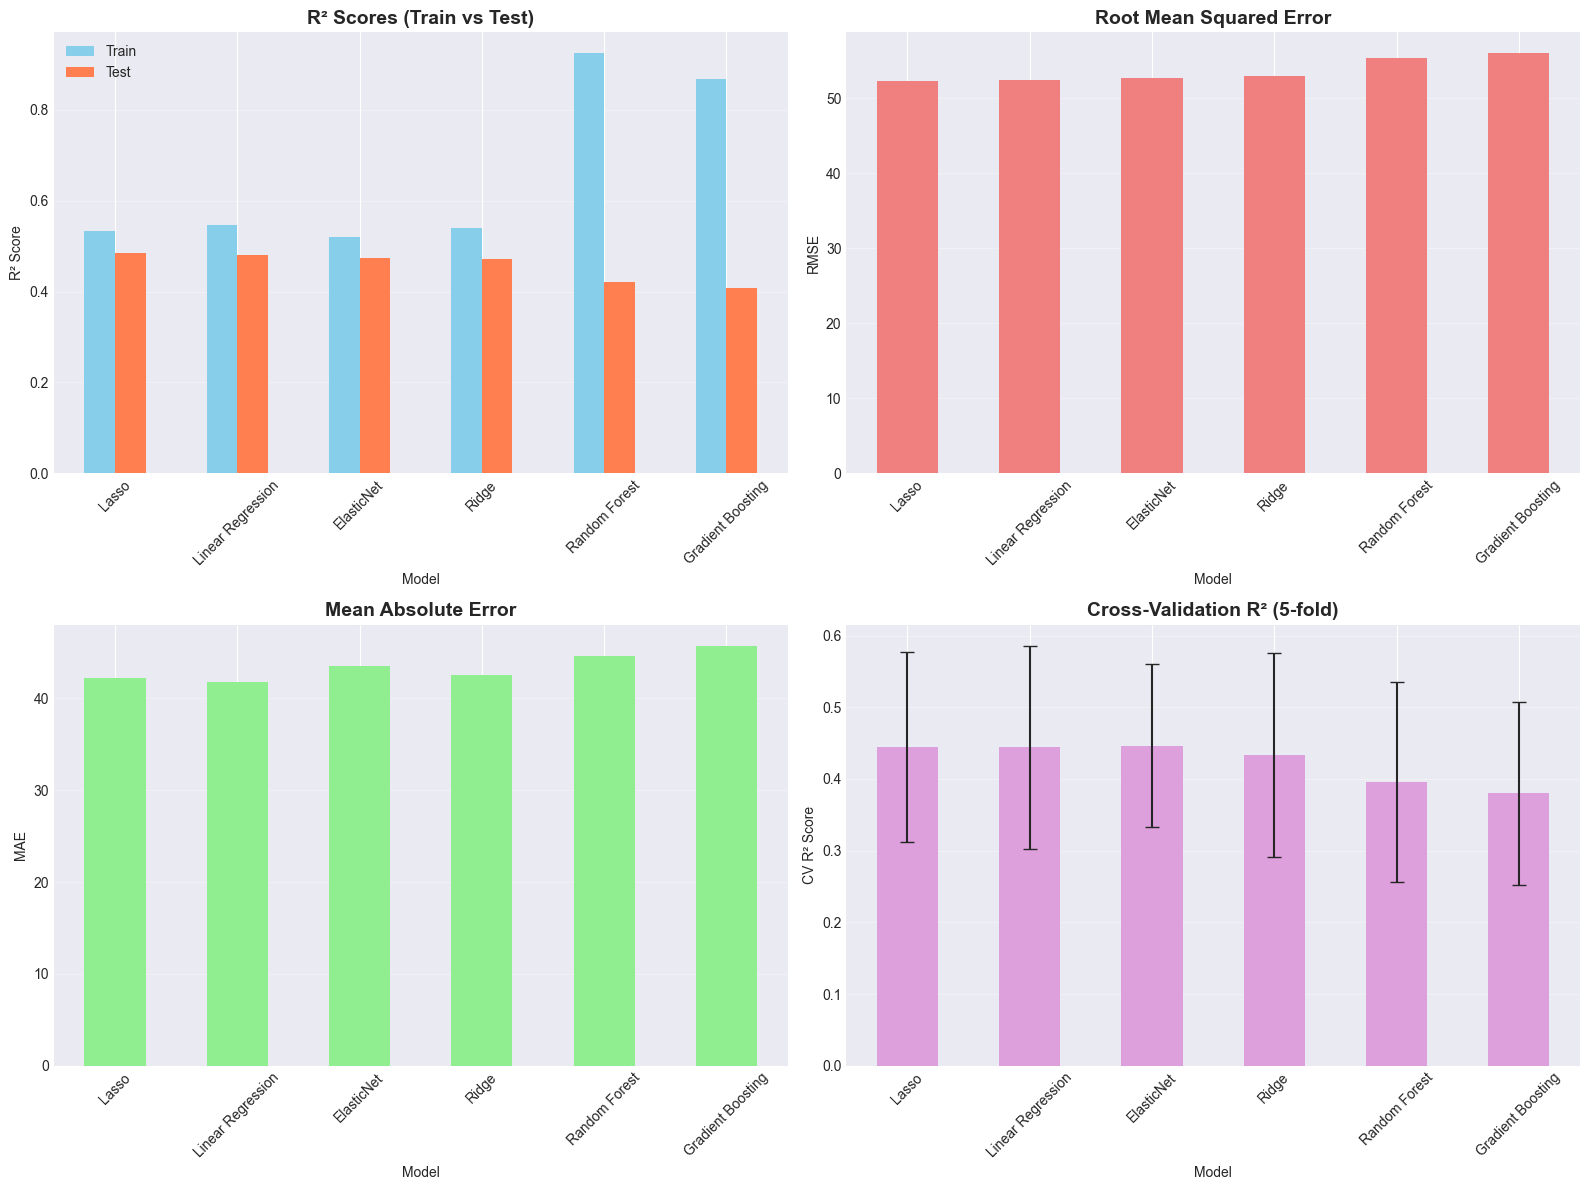

In [40]:

# %%
# Compare models
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('test_r2', ascending=False)

print("\n" + "=" * 80)
print("MODEL COMPARISON RESULTS")
print("=" * 80)
print(results_df)

# %%
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² scores
ax1 = axes[0, 0]
results_df[['train_r2', 'test_r2']].plot(kind='bar', ax=ax1, color=['skyblue', 'coral'])
ax1.set_title('R² Scores (Train vs Test)', fontsize=14, fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_xlabel('Model')
ax1.legend(['Train', 'Test'])
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# RMSE
ax2 = axes[0, 1]
results_df['rmse'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Root Mean Squared Error', fontsize=14, fontweight='bold')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('Model')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# MAE
ax3 = axes[1, 0]
results_df['mae'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Mean Absolute Error', fontsize=14, fontweight='bold')
ax3.set_ylabel('MAE')
ax3.set_xlabel('Model')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Cross-validation scores
ax4 = axes[1, 1]
results_df['cv_mean'].plot(kind='bar', ax=ax4, yerr=results_df['cv_std'], 
                           color='plum', capsize=5)
ax4.set_title('Cross-Validation R² (5-fold)', fontsize=14, fontweight='bold')
ax4.set_ylabel('CV R² Score')
ax4.set_xlabel('Model')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [41]:

# %%
# Select best model for tuning (based on test R²)
best_model_name = results_df.index[0]
print(f"🏆 Best model: {best_model_name}")
print(f"   Test R²: {results_df.iloc[0]['test_r2']:.4f}")
print("\nStarting hyperparameter tuning...\n")


🏆 Best model: Lasso
   Test R²: 0.4846

Starting hyperparameter tuning...



In [42]:

# %%
# Hyperparameter tuning for Random Forest
if 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    base_model = RandomForestRegressor(random_state=42)
    
elif 'Gradient Boosting' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = GradientBoostingRegressor(random_state=42)
    
else:  # Ridge or Lasso
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    }
    if 'Ridge' in best_model_name:
        base_model = Ridge(random_state=42)
    else:
        base_model = Lasso(random_state=42)

# Grid search
grid_search = GridSearchCV(
    base_model, param_grid, cv=5, scoring='r2', 
    n_jobs=-1, verbose=1
)

with mlflow.start_run(run_name=f"{best_model_name}_Tuned"):
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)
    
    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Log to MLflow
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("train_r2", train_r2)
    mlflow.log_metric("test_r2", test_r2)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.sklearn.log_model(best_model, "model")
    
    print("\n" + "=" * 80)
    print("TUNED MODEL RESULTS")
    print("=" * 80)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"\nPerformance:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")



Fitting 5 folds for each of 6 candidates, totalling 30 fits


2025/11/06 13:23:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 13:23:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



TUNED MODEL RESULTS
Best parameters: {'alpha': 1.0}

Performance:
  Train R²: 0.5327
  Test R²: 0.4846
  RMSE: 52.2548
  MAE: 42.2500


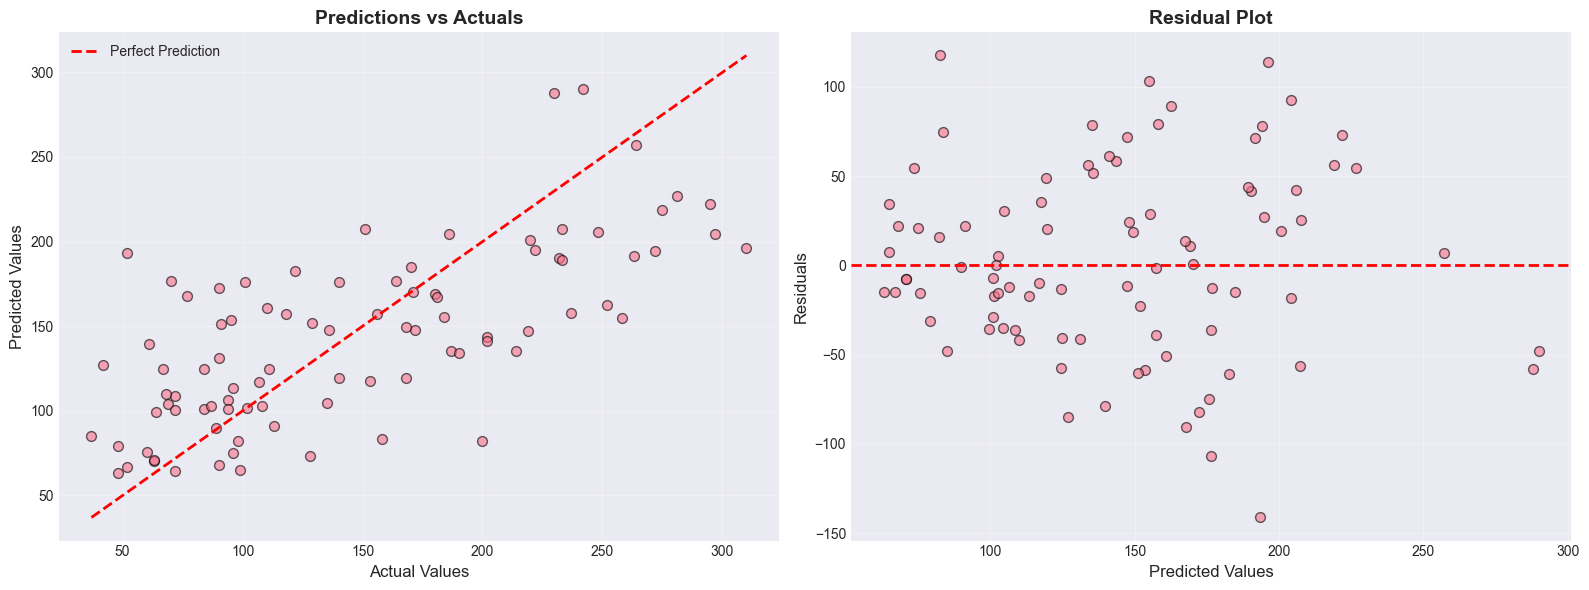

✅ Model saved to models/model.joblib
✅ Scaler saved to models/preprocessor.joblib
✅ Feature names saved to models/feature_names.joblib


In [43]:

# ## 6. Model Evaluation & Visualization

# %%
# Predictions vs Actuals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
ax1 = axes[0]
ax1.scatter(y_test, y_pred_test, alpha=0.6, s=50, edgecolors='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Values', fontsize=12)
ax1.set_ylabel('Predicted Values', fontsize=12)
ax1.set_title('Predictions vs Actuals', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Residual plot
residuals = y_test - y_pred_test
ax2 = axes[1]
ax2.scatter(y_pred_test, residuals, alpha=0.6, s=50, edgecolors='k')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Values', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal')
    plt.xlabel('Importance Score')
    plt.title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# %% [markdown]
# ## 7. Model Saving & Packaging

# %%
# Create models directory
import os
os.makedirs('models', exist_ok=True)

# Save model
model_path = 'models/model.joblib'
joblib.dump(best_model, model_path)
print(f"✅ Model saved to {model_path}")

# Save scaler
scaler_path = 'models/preprocessor.joblib'
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to {scaler_path}")

# Save feature names
feature_names_path = 'models/feature_names.joblib'
joblib.dump(list(X.columns), feature_names_path)
print(f"✅ Feature names saved to {feature_names_path}")


In [44]:

# %%
# Create model card
model_card = {
    "model_name": "Diabetes Progression Predictor",
    "model_type": best_model_name,
    "version": "1.0.0",
    "created_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "dataset": {
        "name": "Diabetes Dataset",
        "source": "sklearn.datasets",
        "n_samples": len(df),
        "n_features": X.shape[1],
        "target": "disease_progression"
    },
    "features": {
        "original": list(diabetes.feature_names),
        "engineered": [
            "bmi_bp", "age_bmi", "s1_s2", "bmi_squared", 
            "bp_squared", "polynomial_features"
        ],
        "total": len(X.columns)
    },
    "preprocessing": {
        "scaler": "StandardScaler",
        "feature_engineering": "Interaction + Polynomial (degree=2)"
    },
    "hyperparameters": grid_search.best_params_,
    "metrics": {
        "train_r2": float(train_r2),
        "test_r2": float(test_r2),
        "rmse": float(rmse),
        "mae": float(mae)
    },
    "feature_importance": feature_importance.head(10).to_dict('records') if hasattr(best_model, 'feature_importances_') else None,
    "usage": {
        "input_format": "scaled features",
        "output_format": "continuous value (disease progression)",
        "prediction_range": [float(y.min()), float(y.max())]
    }
}

# Save model card
model_card_path = 'models/model_card.json'
with open(model_card_path, 'w') as f:
    json.dump(model_card, f, indent=2)

print(f"✅ Model card saved to {model_card_path}")


✅ Model card saved to models/model_card.json


In [45]:

# %%
# Display model card
print("\n" + "=" * 80)
print("MODEL CARD")
print("=" * 80)
print(json.dumps(model_card, indent=2))



MODEL CARD
{
  "model_name": "Diabetes Progression Predictor",
  "model_type": "Lasso",
  "version": "1.0.0",
  "created_date": "2025-11-06 13:23:21",
  "dataset": {
    "name": "Diabetes Dataset",
    "source": "sklearn.datasets",
    "n_samples": 442,
    "n_features": 24,
    "target": "disease_progression"
  },
  "features": {
    "original": [
      "age",
      "sex",
      "bmi",
      "bp",
      "s1",
      "s2",
      "s3",
      "s4",
      "s5",
      "s6"
    ],
    "engineered": [
      "bmi_bp",
      "age_bmi",
      "s1_s2",
      "bmi_squared",
      "bp_squared",
      "polynomial_features"
    ],
    "total": 24
  },
  "preprocessing": {
    "scaler": "StandardScaler",
    "feature_engineering": "Interaction + Polynomial (degree=2)"
  },
  "hyperparameters": {
    "alpha": 1.0
  },
  "metrics": {
    "train_r2": 0.532737198868537,
    "test_r2": 0.48461960808543636,
    "rmse": 52.25479427357184,
    "mae": 42.25002663726136
  },
  "feature_importance": null,
  "us

In [46]:

# ## 8. Test Saved Model

# %%
# Load saved model and test
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Make sample prediction
sample_idx = 0
sample_data = X_test.iloc[sample_idx:sample_idx+1]
sample_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_scaled)

print("Sample Prediction Test:")
print(f"  Input features: {sample_data.values[0][:5]}...")
print(f"  Predicted: {prediction[0]:.2f}")
print(f"  Actual: {y_test.iloc[sample_idx]:.2f}")
print(f"  Error: {abs(prediction[0] - y_test.iloc[sample_idx]):.2f}")
print("\n✅ Model loading and prediction successful!")


Sample Prediction Test:
  Input features: [ 0.04534098 -0.04464164 -0.00620595 -0.01599898  0.1250187 ]...
  Predicted: 147.22
  Actual: 219.00
  Error: 71.78

✅ Model loading and prediction successful!



# ## Summary
# 
# ### Key Achievements:
# - ✅ Comprehensive EDA with visualizations
# - ✅ Feature engineering (interaction + polynomial features)
# - ✅ Multiple model comparison (6 algorithms)
# - ✅ MLflow experiment tracking
# - ✅ Hyperparameter tuning with GridSearchCV
# - ✅ Model evaluation with multiple metrics
# - ✅ Model packaging with scaler and feature names
# - ✅ Complete model card documentation
# 
# ### Best Model Performance:
### Summary
**Model:** Lasso
**Test R²:** 0.4846
**RMSE:** 52.2548
**MAE:** 42.2500

In [ ]:

print("\n" + "=" * 80)
print("🎉 NOTEBOOK COMPLETE!")
print("=" * 80)


🎉 NOTEBOOK COMPLETE!
